# Real Estate Statistics Indicator

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('unsold_house     : 미분양주택현황 (2007년 ~ )')
print('licensing_house  : 주택건설인허가실적 (2007년 ~ )')
print('completion_house : 주택준공실적 (2010년 ~ )')
print('start_house      : 주택작공실적 (2011년 ~ )')

unsold_house = pd.read_csv('unsold_house.csv')
licensing_house = pd.read_csv('house_construction_licensing.csv')
completion_house = pd.read_csv('house_completion.csv')
start_house = pd.read_csv('start_house.csv')

unsold_house     : 미분양주택현황 (2007년 ~ )
licensing_house  : 주택건설인허가실적 (2007년 ~ )
completion_house : 주택준공실적 (2010년 ~ )
start_house      : 주택작공실적 (2011년 ~ )


## 주택준공 / 착공 / 인허가 / 미분양 현황 (전국)

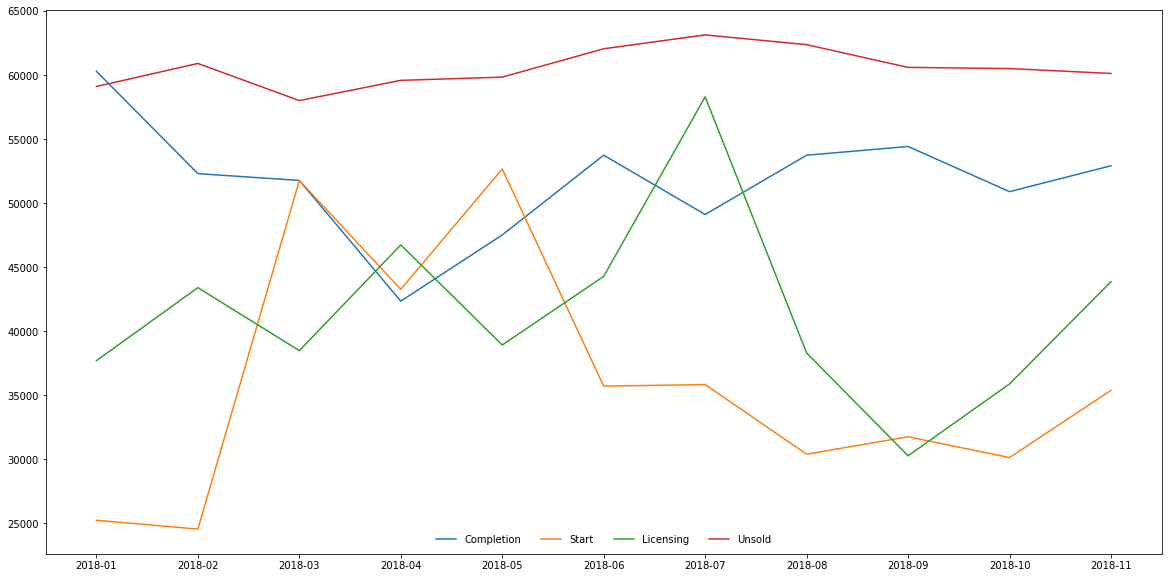

In [25]:
put_year = "2018"

completion = completion_house[completion_house['year'].str.contains(put_year)]
start = start_house[start_house['year'].str.contains(put_year)]
licensing = licensing_house[licensing_house['year'].str.contains(put_year)]
unsold = unsold_house[unsold_house['year'].str.contains(put_year)]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(completion['year'], completion['all_region'], label='Completion')
ax.plot(start['year'], start['all_region'], label='Start')
ax.plot(licensing['year'], licensing['all_region'], label='Licensing')
ax.plot(unsold['year'], unsold['all_region'], label='Unsold')

ax.legend(loc = 'lower center', frameon=False, ncol=4);

## 주택준공 / 착공 / 인허가 / 미분양 현황 (지역별)

In [26]:
region_name = completion_house.columns[2:]
for i in range(len(region_name)):
    print(region_name[i], end=" / ")

seoul / busan / daegu / incheon / gwangju / daejeon / ulsan / sejong / gyeonggi / gangwon / cb / cn / jb / jn / kb / kn / jeju / 

In [27]:
put_year = "2018"
put_region = ['year','flag','seoul','gyeonggi','incheon']

completion_house['flag'] = 'completion'
start_house['flag'] = 'start'
licensing_house['flag'] = 'licensing'
unsold_house['flag'] = 'unsold'

regional = pd.concat([completion_house, start_house, licensing_house, unsold_house])
regional = regional.loc[regional['year'].str.contains(put_year), put_region]
regional = pd.melt(regional, id_vars=['year','flag'], var_name='region', value_name='house')

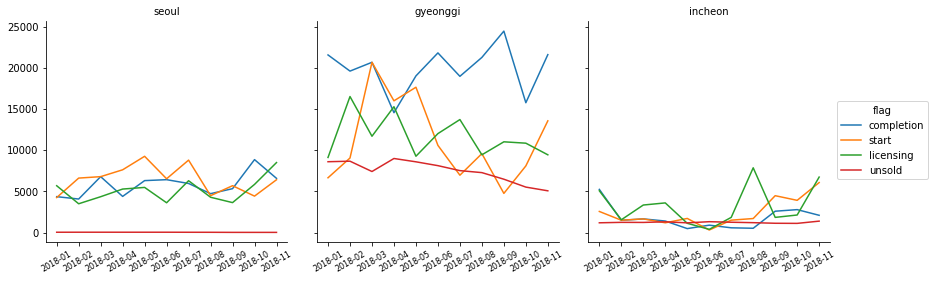

In [28]:
G1 = sns.FacetGrid(regional, col='region',hue='flag', col_wrap=3, size=4)
G1 = G1.map(plt.plot, 'year', 'house').add_legend()
G1.set_xticklabels(rotation=30, fontsize=8)
G1.set_xlabels('')
G1.set_ylabels('')
G1.set_titles('{col_name}');